<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-SIR-Model-(of-disease-spread)" data-toc-modified-id="The-SIR-Model-(of-disease-spread)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The SIR Model (of disease spread)</a></span><ul class="toc-item"><li><span><a href="#The-Rate-Equations" data-toc-modified-id="The-Rate-Equations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The Rate Equations</a></span></li><li><span><a href="#Solve-the-system-of-differential-equations!" data-toc-modified-id="Solve-the-system-of-differential-equations!-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Solve the system of differential equations!</a></span></li><li><span><a href="#Visualisation,-Numberphile-style" data-toc-modified-id="Visualisation,-Numberphile-style-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualisation, Numberphile-style</a></span></li><li><span><a href="#Adding-interactivity" data-toc-modified-id="Adding-interactivity-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Adding interactivity</a></span></li></ul></li><li><span><a href="#Flatten-The-Curve" data-toc-modified-id="Flatten-The-Curve-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Flatten The Curve</a></span><ul class="toc-item"><li><span><a href="#Social-distancing" data-toc-modified-id="Social-distancing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Social distancing</a></span></li><li><span><a href="#Increasing-the-recovery-rate" data-toc-modified-id="Increasing-the-recovery-rate-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Increasing the recovery rate</a></span></li></ul></li><li><span><a href="#R0:-the-basic-reproductive-number" data-toc-modified-id="R0:-the-basic-reproductive-number-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>R0: the basic reproductive number</a></span></li><li><span><a href="#Lights,-camera,-animate!" data-toc-modified-id="Lights,-camera,-animate!-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Lights, camera, animate!</a></span></li></ul></div>

# The Coronavirus Curve - Numberphile

[![ben sparks](../images/2020-03-20_ben_sparks.jpg)](https://www.youtube.com/watch?v=k6nLfCbAzgo)

<div align="center"><a href="https://www.youtube.com/watch?v=k6nLfCbAzgo" style="font-size: large;"><strong>Watch <em>The Coronavirus Curve - Numberphile</em> on YouTube</strong></a></div>

**Video Description**
> _Ben Sparks explains (and codes) the so-called SIR Model being used to predict the spread of cornavirus (COVID-19)._
> 
> **LINKS**
> - National Health Service (UK) advice on Coronavirus: https://www.nhs.uk/conditions/coronavirus-covid-19/
> - Ben Sparks: https://www.bensparks.co.uk
> - Use the Geogebra file Ben created for this video: https://www.geogebra.org/m/nbjfjtpv
> - Another good file courtesy of Juan Carlos Ponce Campuzano: https://www.geogebra.org/m/utbemrca 
> - Washington Post simulator: https://www.washingtonpost.com/graphics/2020/world/corona-simulator/
> - Extended presentation by Nick Jewell for MSRI: https://youtu.be/MZ957qhzcjI
> - More videos with Ben Sparks: http://bit.ly/Sparks_Playlist
> 
> **SOME OTHER YOUTUBERS ON THIS TOPIC...**
> - 3blue1brown on the exponential growth of epidemics: https://youtu.be/Kas0tIxDvrg
> - Tom Crawford on the SIR Model: https://youtu.be/NKMHhm2Zbkw
> - Kurzgesagt on COVID-19: https://youtu.be/BtN-goy9VOY
> 
> **NUMBERPHILE**
> - Website: http://www.numberphile.com/
> - Numberphile on Facebook: http://www.facebook.com/numberphile
> - Numberphile tweets: https://twitter.com/numberphile
> Subscribe: http://bit.ly/Numberphile_Sub
> 
> Videos by [Brady Haran](https://www.bradyharanblog.com/) ([@BradyHaran](https://twitter.com/BradyHaran))

In [1]:
# This is where the magic happens. ✨
%load_ext nb_black

import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Video
from ipywidgets import interact, interact_manual
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

<IPython.core.display.Javascript object>

## The SIR Model (of disease spread)
The three variables we'll use:
- **S = Susceptible** (people who are possibly able to get the disease)
- **I = Infected** (people who have got the disease)
- **R = Recovered** (people who are not infected any more, may be recovered, may be dead)

**Goal:** build up some simple naïve assumptions of how diseases spread & follow the mathematical consequences to make a prediction.

In [3]:
## Set up some initial conditions

# Population of size 1, i.e. 100% (N is between 0 and 1)
N = 1

# Assume some Infected people (1% are Infected)
Istart = 0.01

# Assume some people are Susceptible
Sstart = N - Istart

# Nobody yet has Recovered
Rstart = 0

print(f"Starting conditions: N = {N}, S = {Sstart}, I = {Istart}, R = {Rstart}")

Starting conditions: N = 1, S = 0.99, I = 0.01, R = 0


<IPython.core.display.Javascript object>

In [4]:
## For now, fix these "rate" variables

# transm = Transmission/infection rate, how quickly the disease gets transmitted.
transm = 3.2

# recov = Recovery rate, how quickly people recover, this should be
# smaller as it takes people longer to recover from a disease.
recov = 0.23

# maxT = How long we're going to let the model run for.
maxT = 1

<IPython.core.display.Javascript object>

### The Rate Equations
We'll set up some "rate equations" (a.k.a. "differential equations") that tell us about each variable's rate of change. If you would like to learn more about differential equations, [3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw) has an [_excellent_ series on YouTube here](https://www.youtube.com/watch?v=p_di4Zn4wz4&list=PLZHQObOWTQDNPOjrT6KVlfJuKtYTftqH6) or you could try this [introductory course on Brilliant](https://brilliant.org/courses/differential-equations/).

Differential equations describe the mathematics of change and appear in every branch of science and beyond. They can be used to describe and model anything that changes, from rockets to bodies to stock markets.

The three equations that form the SIR Model are described (using mathematical notation) as follows:

> $\frac{dS}{dT} = - TransmissionRate * S * I$
> 
> $\frac{dI}{dT} = TransmissionRate * S * I - RecoveryRate * I$
> 
> $\frac{dR}{dt} = RecoveryRate * I$

Do these make sense?
- The rate of change of **Susceptibles**, $\frac{dS}{dT}$, is negative because the rate will go down as more Susceptible people get Infected.
- The rate of change of **Infected**, $\frac{dI}{dT}$, is the number who will become Infected next (those who are Susceptible) less those who Recover (the more people become Infected, the more people can Recover).
- The rate of change of **Recovery**, $\frac{dR}{dt}$, is decided by how many people are Infected.

In [5]:
## Let's write these in Python.


def dS_dT(S, I, transm):
    """The rate of change of Susceptibles over time.
    
    Args:
        S (float): Total who are Susceptible.
        I (float): Total who are Infected.
        transm (float): transmission rate.
    
    Returns:
        float: rate of change of Suscpetibles.
    
    Examples:
        
        >> dS_dT(S=0.99, I=0.01, transm=3.2)
        -0.03168
    """
    # Negative because rate will go down as more Susceptible people get Infected.
    return -transm * S * I


def dI_dT(S, I, transm, recov):
    """The rate of change of Infected people over time.
    
    Args:
        S (float): Total who are Susceptible.
        I (float): Total who are Infected.
        transm (float): transmission rate.
        recov (float): recovery rate.
    
    Returns:
        float: rate of change of Infected.
    
    Examples:
    
        >> dI_dT(S=0.99, I=0.01, transm=3.2, recov=0.23)
        0.02938
    """
    return (
        transm * S * I  # If people were Susceptible, they'll become Infected next.
        - recov * I  # The more people become Infected, the more people can Recover.
    )


def dR_dT(I, recov):
    """The rate of change of Recovered people over time.
    
    Args:
        I (float): Total who are Infected.
        recov (float): recovery rate.
    
    Returns:
        float: rate of change of Recovered.
    
    Examples:
    
        >> dR_dT(I=0.01, recov=0.23)
        0.0023
    """
    return recov * I  # Anyone who's Infected can Recover.

<IPython.core.display.Javascript object>

### Solve the system of differential equations!
First we create a single function to hold all three rate equations, because Python's [solver function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) wants to be given a single input function, not three.

In [6]:
def SIR(t, y):
    """
    This function specifies a system of differential equations to be solved,
    and their parameters. We will pass this to the solve_ivp [1]_ function
    from the scipy library.
    
    Args:
        t (float): time step.
        y (list):  parameters, in this case a list containing [S, I, R, transm, recov].
        
    Returns:
        list: Calculated values [S, I, R, transm, recov]
    
    Examples:
        
        >>> SIR(t=0, y=[0.99, 0.01, 0.0, 3.2, 0.23])
        [-0.03168, 0.02938, 0.0023]
    
    .. [1] https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
    """
    S, I, R = y
    return [
        dS_dT(S, I, transm),
        dI_dT(S, I, transm, recov),
        dR_dT(I, recov),
    ]


# Let's take it for a spin
SIR(t=0, y=[0.99, 0.01, 0.0])

[-0.03168, 0.02938, 0.0023]

<IPython.core.display.Javascript object>

Now we can solve the system of differential equations! You can learn more about [scipy's `solve_ivp()` function here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).

In [7]:
# Solve the system of differential equations!
solution = solve_ivp(
    fun=SIR,  # input function
    t_span=[0, maxT],  # start at time 0 and continue until we get to maxT
    t_eval=np.arange(0, maxT, 0.1),  # points at which to store the computed solutions
    y0=[Sstart, Istart, Rstart],  # initial conditions
)
solution

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 26
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
 t_events: None
        y: array([[9.90000000e-01, 9.86325033e-01, 9.81423758e-01, 9.74904666e-01,
        9.66265367e-01, 9.54902775e-01, 9.40046957e-01, 9.20736140e-01,
        8.95989092e-01, 8.64814065e-01],
       [1.00000000e-02, 1.34076459e-02, 1.79508000e-02, 2.39909898e-02,
        3.19905744e-02, 4.25019635e-02, 5.62296686e-02, 7.40507811e-02,
        9.68423262e-02, 1.25472318e-01],
       [0.00000000e+00, 2.67320917e-04, 6.25441780e-04, 1.10434453e-03,
        1.74405845e-03, 2.59526110e-03, 3.72337443e-03, 5.21307882e-03,
        7.16858147e-03, 9.71361636e-03]])
 y_events: None

<IPython.core.display.Javascript object>

Let's create a pandas DataFrame with the calculated SIR values (solution.y) in the cells and the time steps (solution.t) as the index.

In [8]:
df = pd.DataFrame(
    solution.y.T, columns=["Susceptible", "Infected", "Recovered"], index=solution.t,
)
df

,Susceptible,Infected,Recovered
0.0,0.990000,0.010000,0.000000
0.1,0.986325,0.013408,0.000267
0.2,0.981424,0.017951,0.000625
0.3,0.974905,0.023991,0.001104
0.4,0.966265,0.031991,0.001744
0.5,0.954903,0.042502,0.002595
0.6,0.940047,0.056230,0.003723
0.7,0.920736,0.074051,0.005213
0.8,0.895989,0.096842,0.007169
0.9,0.864814,0.125472,0.009714


<IPython.core.display.Javascript object>

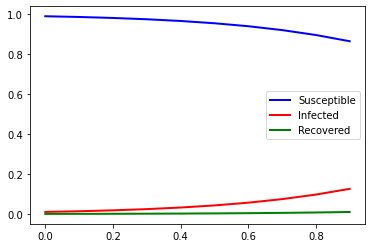

<IPython.core.display.Javascript object>

In [9]:
# Visualise the result!
plot = df.plot(color=["blue", "red", "green"], lw=2)

### Visualisation, Numberphile-style
Let make a helper function which also adds a larger x-axis, and also let's add the official Numberphile brown paper as a background.

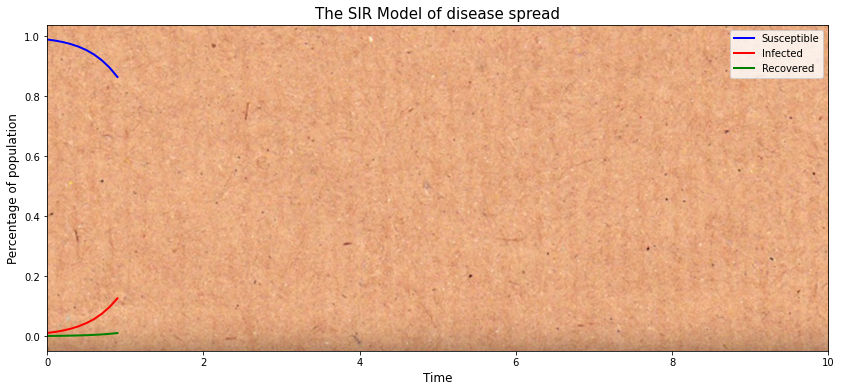

<IPython.core.display.Javascript object>

In [10]:
background = mpimg.imread("../images/numberphile_background.jpg")


def plot_curves(solution, xlim=[0, 10], title=None, add_background=True):
    """Helper function that takes a solution and optionally visualises it
       using official Numberphile brown paper.
    
    Args:
        solution (scipy.integrate._ivp.ivp.OdeResult): Output of solve_ivp() function.
        xlim (list): x-axis limits in format [min, max].
        title (str): Optional graph title.
        add_background (bool): Add Numberphile brown paper background?
    
    Returns:
        matplotlib graph of SIR model curves.
    
    Examples:
    
        >>> solution = solve_ivp(SIR, t_span=[0, maxT], t_eval=np.arange(0, maxT, 0.1),
                                 y0=[Sstart, Istart, Rstart])
        >>> plot_curves(solution, title="The SIR Model of disease spread")
    """
    # Set up plot
    fig, ax = plt.subplots(figsize=(14, 6))
    plt.title(title, fontsize=15)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Percentage of population", fontsize=12)
    # Create DataFrame
    df = pd.DataFrame(
        solution.y.T,
        columns=["Susceptible", "Infected", "Recovered"],
        index=solution.t,
    )
    # Make the plot
    plot = df.plot(color=["blue", "red", "green"], lw=2, ax=ax)
    plot.set_xlim(xlim[0], xlim[1])
    # Add background?
    if add_background:
        plot.imshow(
            background,
            aspect=plot.get_aspect(),
            extent=plot.get_xlim() + plot.get_ylim(),
            zorder=1,
        )


plot_curves(solution, title="The SIR Model of disease spread")

Let's also create another helper function that plugs into the ipywidgets `interact`, so we can play around with the parameters.

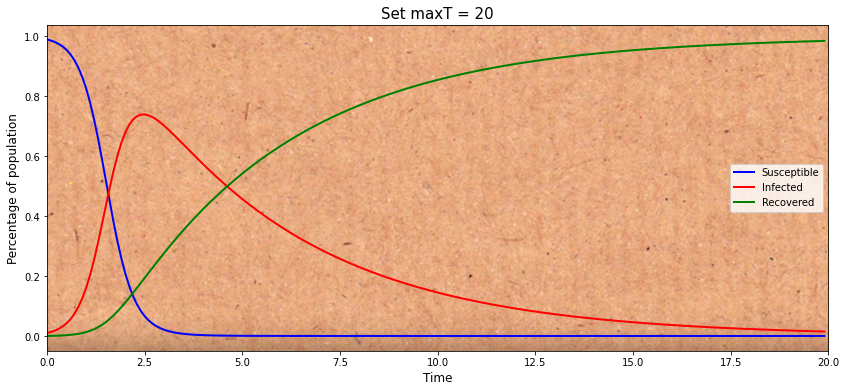

<IPython.core.display.Javascript object>

In [11]:
def solve_and_plot(
    Istart=0.01,
    Rstart=0,
    transm=3.2,
    recov=0.23,
    maxT=20,
    title=None,
    add_background=True,
):
    """Helper function so we can play around with the parameters using the interact ipywidget.
    
    Args:
        Istart (float): Starting value for Infected (as percent of population).
        Rstart (float): Starting value for Recovered (as percent of population).
        transm (float): transmission rate.
        recov (float): recovery rate.
        maxT (int): maximum time step.
        title (str): Optional graph title.
        add_background (bool): Optionally add Numberphile background.
    
    Returns:
        matplotlib graph of SIR model curves.
    
    Examples:
    
        >>> solve_and_plot(maxT=20, title="Set maxT = 20")
    """

    N = 1
    Sstart = N - Istart

    def SIR(t, y):
        """We need to redefine this inside solve_and_plot() otherwise it
           won't pick up any changes to transm or recov.
        """
        S, I, R = y
        return [
            dS_dT(S, I, transm),
            dI_dT(S, I, transm, recov),
            dR_dT(I, recov),
        ]

    solution = solve_ivp(
        fun=SIR,
        t_span=[0, maxT],
        t_eval=np.arange(0, maxT, 0.1),
        y0=[Sstart, Istart, Rstart],
    )
    plot_curves(solution, xlim=[0, maxT], title=title, add_background=add_background)


# Let's set maxT to 20 to see how things pan out
solve_and_plot(maxT=20, title="Set maxT = 20")

### Adding interactivity
We can make this interactive using the interact function from ipywidgets!

> Note: we use `interact_manual` in order to add a button as the graph can take a couple seconds to update.

In [12]:
interact_manual(
    solve_and_plot,
    Istart=(0, 1, 0.01),
    Rstart=(0, 1, 0.01),
    transm=(0, 10, 0.01),
    recov=(0, 1, 0.01),
    maxT=(0, 20, 1),
    title="",
)

interactive(children=(FloatSlider(value=0.01, description='Istart', max=1.0, step=0.01), FloatSlider(value=0.0…

<function __main__.solve_and_plot(Istart=0.01, Rstart=0, transm=3.2, recov=0.23, maxT=20, title=None, add_background=True)>

<IPython.core.display.Javascript object>

---

[![](../images/2020-03-20_ben_sparks_2.jpg)](https://www.youtube.com/watch?v=k6nLfCbAzgo&t=850)
<div align="center"><em>(click the image to be taken to the equivalent part of the Numberphile video)</em></div>

> "In this model, almost 80% of the population got it at once. If you project that to our NHS, that's a problem."
---

## Flatten The Curve
If we disable the background then re-drawing the graph becomes fast enough to make changes to the parameters in real-time! Have a play, see if you can squash the sombrero!

In [13]:
interact(
    solve_and_plot,
    Istart=(0, 1, 0.01),
    Rstart=(0, 1, 0.01),
    transm=(0, 10, 0.01),
    recov=(0, 1, 0.01),
    maxT=(0, 50, 1),
    title="",
    add_background=False,
)

interactive(children=(FloatSlider(value=0.01, description='Istart', max=1.0, step=0.01), FloatSlider(value=0.0…

<function __main__.solve_and_plot(Istart=0.01, Rstart=0, transm=3.2, recov=0.23, maxT=20, title=None, add_background=True)>

<IPython.core.display.Javascript object>

### Social distancing
Let's try decreasing the transmission rate (e.g. implement social distancing). Notice how the red curve flattens as the transmission rate is reduced.

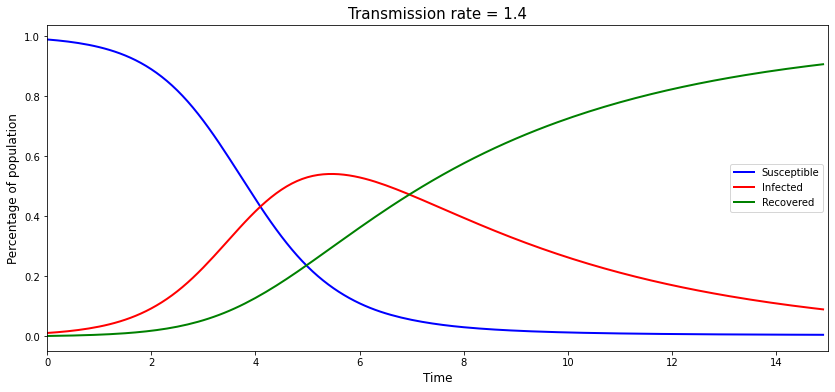

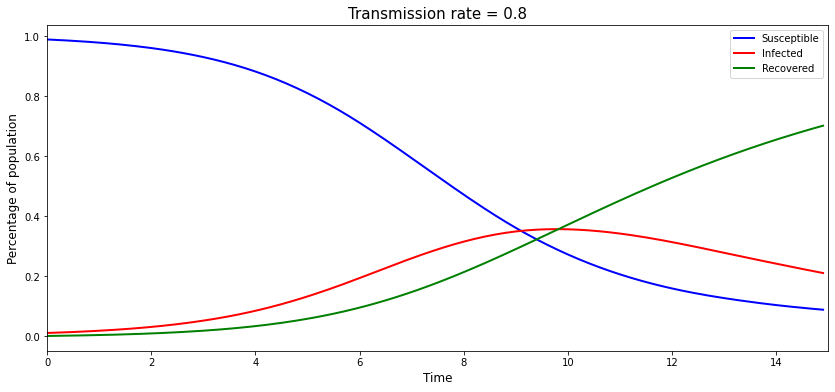

<IPython.core.display.Javascript object>

In [14]:
# Transmission rate = 1.4
solve_and_plot(
    transm=1.4,
    recov=0.23,
    maxT=15,
    add_background=False,
    title="Transmission rate = 1.4",
)

# Transmission rate = 0.8
solve_and_plot(
    transm=0.8,
    recov=0.23,
    maxT=15,
    add_background=False,
    title="Transmission rate = 0.8",
)

If you reduce the transmission rate enough, it turns out that not _everyone_ ends up being infected. There's still 10% - 20% of people who remain susceptible in the long run but they never get the disease.

This is what we're hoping for with COVID-19, as there are some people who will not survive the disease. If you can stop the 10% most vulnerable from getting it, this would be great.

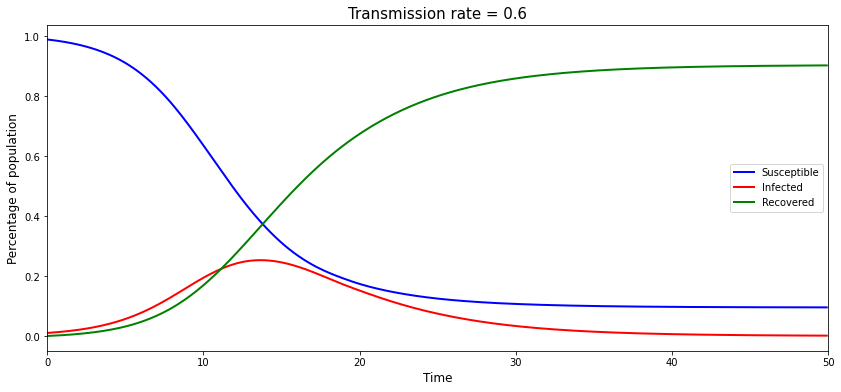

<IPython.core.display.Javascript object>

In [15]:
solve_and_plot(
    transm=0.6,
    recov=0.23,
    maxT=50,
    add_background=False,
    title="Transmission rate = 0.6",
)

### Increasing the recovery rate
Increasing the recovery rate also flattens the curve but this is much harder to do. The NHS is currently doing this by helping people to recover quickly, but in practice we know it takes people a week to recover and sometimes a lot longer.

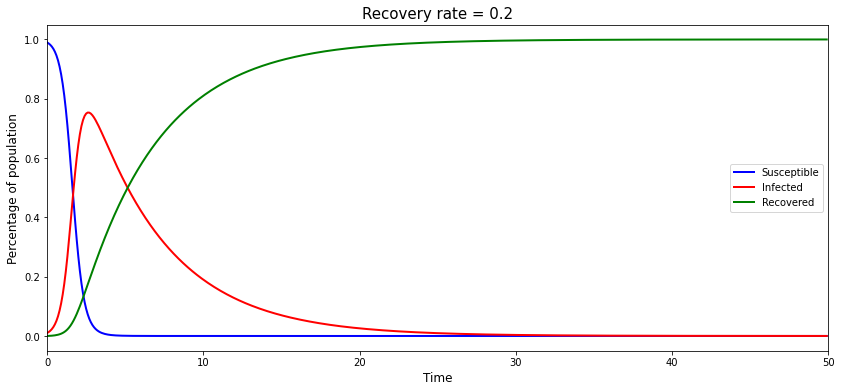

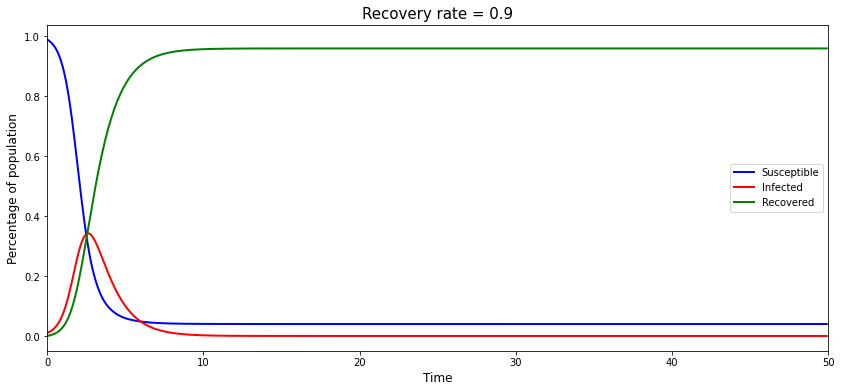

<IPython.core.display.Javascript object>

In [16]:
solve_and_plot(
    transm=3, recov=0.2, maxT=50, add_background=False, title="Recovery rate = 0.2"
)
solve_and_plot(
    transm=3, recov=0.9, maxT=50, add_background=False, title="Recovery rate = 0.9"
)

## R0: the basic reproductive number
You may have heard people talking about [R0, the basic reproductive number](https://en.wikipedia.org/wiki/Basic_reproduction_number):
- An R0 of 2-3 means that every infected person infects, on average, two to three others.
- An R0 less than 1 indicates that each infected person results in fewer than one new infection. When this happens, the outbreak will slowly grind to a halt.
- For COVID-19, [current estimates predict an R0 between 1.4-3.9](https://en.wikipedia.org/wiki/Basic_reproduction_number).

In [17]:
# Let's calculate R0. This can be calculated as transm / recov.
transm = 0.5
recov = 0.14
R_0 = transm / recov
print(f"R_0 = {R_0}")

R_0 = 3.571428571428571


<IPython.core.display.Javascript object>

If the COVIF-19 R0 is 3, let's see what that looks like. (Remember that the units of time doesn't mean too much here.)

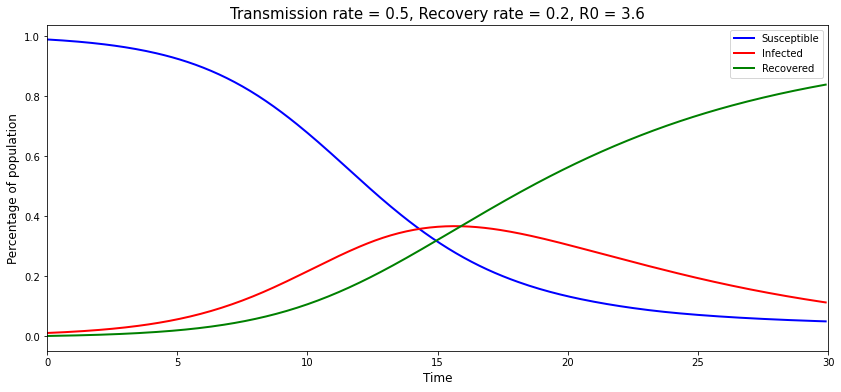

<IPython.core.display.Javascript object>

In [18]:
solve_and_plot(
    transm=0.5,
    recov=0.14,
    maxT=30,
    add_background=False,
    title=f"Transmission rate = 0.5, Recovery rate = 0.2, R0 = {0.5/0.14:.1f}",
)

We'll leave it to you to play with the sliders and get a feel for how each input changes the landscape of how the infection could play out.

In [19]:
interact(
    solve_and_plot,
    Istart=(0, 1, 0.01),
    Rstart=(0, 1, 0.01),
    transm=(0, 10, 0.01),
    recov=(0, 1, 0.01),
    maxT=(0, 50, 1),
    title="The Coronavirus Curve",
    add_background=False,
)

interactive(children=(FloatSlider(value=0.01, description='Istart', max=1.0, step=0.01), FloatSlider(value=0.0…

<function __main__.solve_and_plot(Istart=0.01, Rstart=0, transm=3.2, recov=0.23, maxT=20, title=None, add_background=True)>

<IPython.core.display.Javascript object>

## Lights, camera, animate!
Let's create an animated chart in Python for maximum social media virality.

In [20]:
# First, let's run the numbers
transm = 2.4
recov = 0.3
maxT = 13


def SIR(t, y):
    S, I, R = y
    return [
        dS_dT(S, I, transm),
        dI_dT(S, I, transm, recov),
        dR_dT(I, recov),
    ]


solution = solve_ivp(
    fun=SIR,
    t_span=[0, maxT],
    t_eval=np.arange(0, maxT, 0.1),
    y0=[Sstart, Istart, Rstart],
)
df = pd.DataFrame(
    solution.y.T, columns=["Susceptible", "Infected", "Recovered"], index=solution.t,
)
df.head()

,Susceptible,Infected,Recovered
0.0,0.990000,0.010000,0.000000
0.1,0.987363,0.012303,0.000333
0.2,0.984130,0.015127,0.000743
0.3,0.980172,0.018581,0.001247
0.4,0.975332,0.022802,0.001866


<IPython.core.display.Javascript object>

We need to enable matplotlib's "notebook" plotting mode in order to see the graphs animating live in the notebook.

In [21]:
%matplotlib notebook
%matplotlib notebook
# See here for why we call this twice: https://github.com/ipython/ipython/issues/10873

<IPython.core.display.Javascript object>

First, let's animate without the Numberphile background.

<IPython.core.display.Javascript object>


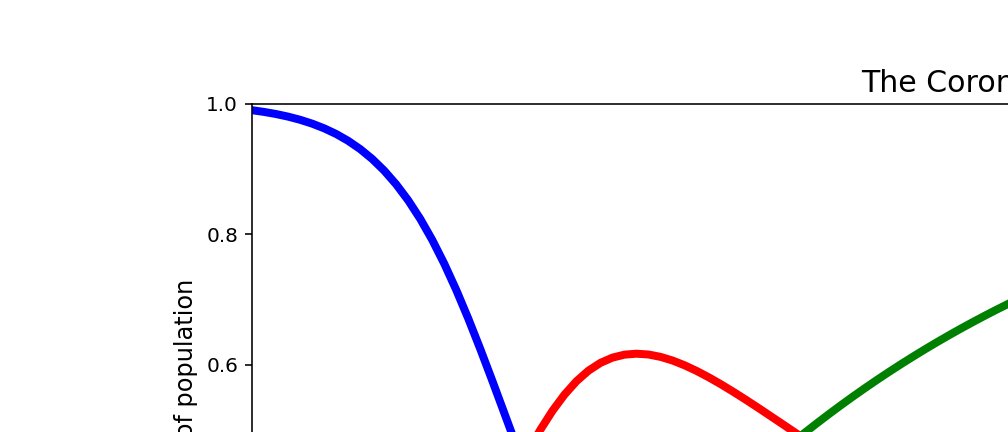

<IPython.core.display.Javascript object>

In [22]:
def animate(i):
    """We put all the animation update code into one function
       that loads the first i rows from the dataframe df."""
    ax.clear()
    data = df.iloc[: i + 1]
    plot = data.plot(color=["blue", "red", "green"], lw=4, ax=ax)
    plt.title("The Coronavirus Curve", fontsize=15)
    plt.xlabel("Time (units)", fontsize=12)
    plt.ylabel("Percentage of population", fontsize=12)
    plot.set_xlim(0, maxT)
    plot.set_ylim(0, 1)


fig, ax = plt.subplots(figsize=(14, 6))
animate(0)  # initialise the plot
ani = FuncAnimation(
    fig, animate, frames=list(range(len(df))), repeat=False, interval=50, blit=True,
)
plt.show()

The live animation is a bit slow as it's rendering in real time, but you can also save the full-speed animation as a smooth movie.

In [23]:
ani.save("../images/coronavirus_curve_no_background.mp4")

<IPython.core.display.Javascript object>

In [24]:
Video("../images/coronavirus_curve_no_background.mp4", width=1000)

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-danger">
<b>Danger:</b> This next cell may be quite slow to run. Proceed with caution.
</div>

Let's now add the Numberphile brown paper background.

<IPython.core.display.Javascript object>


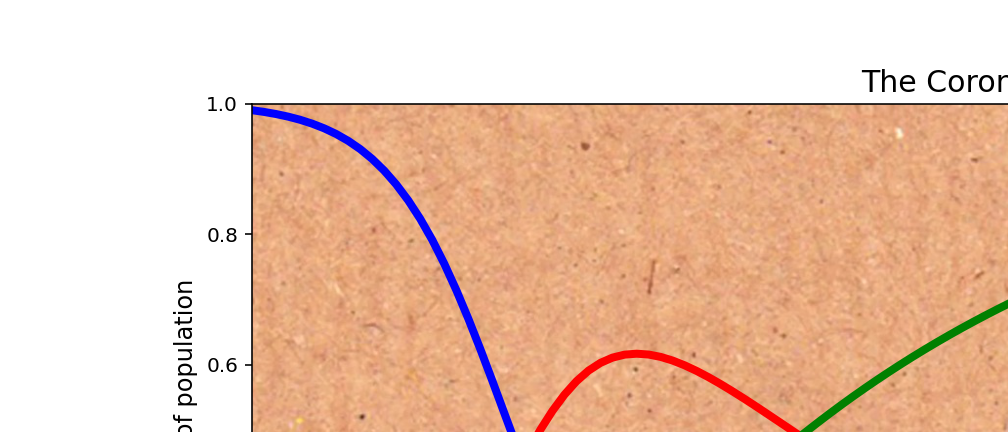

<IPython.core.display.Javascript object>

In [25]:
# N.B. this may be very slow


def animate(i):
    ax.clear()
    data = df.iloc[: i + 1]
    plot = data.plot(color=["blue", "red", "green"], lw=4, ax=ax)
    plt.title("The Coronavirus Curve", fontsize=15)
    plt.xlabel("Time (units)", fontsize=12)
    plt.ylabel("Percentage of population", fontsize=12)
    plot.set_xlim(0, maxT)
    plot.set_ylim(0, 1)
    plot.imshow(
        background,
        aspect=plot.get_aspect(),
        extent=plot.get_xlim() + plot.get_ylim(),
        zorder=1,
    )


fig, ax = plt.subplots(figsize=(14, 6))
background = mpimg.imread("../images/numberphile_background.jpg")
animate(0)
ani = FuncAnimation(
    fig, animate, frames=list(range(len(df))), repeat=False, interval=50, blit=True,
)

This is definitely quite slow, so let's save it as a full screen movie that you can be proud to share with friends & family.

In [26]:
ani.save("../images/coronavirus_curve.mp4")

<IPython.core.display.Javascript object>

In [27]:
Video("../images/coronavirus_curve.mp4", width=1000)

<IPython.core.display.Javascript object>

---

<div class="alert alert-block alert-success">
    <strong>Congratulations!</strong>
    <p>
        If you enjoyed this notebook please consider <a href="http://bit.ly/Numberphile_Sub">subscribing to Numberphile on YouTube</a>. You can <a href="http://bit.ly/Sparks_Playlist">see more of Ben Sparks' videos here</a>.
    </p><br/>
    <p><em><strong>Disclaimer:</strong> This notebook and its creator are not affiliated, associated, authorised, endorsed by, or in any way officially connected with Brady Haran, Ben Sparks, Numberphile or its affiliates. We made this simply because they inspire us.</em></p>
</div>

---

<div class="alert alert-block alert-info">
    <strong>About</strong>
    <p>
        This notebook has been made by <a href="https://twitter.com/john_sandall">@John_Sandall</a>. I run training workshops in Python, data science and data engineering.
    </p><br/>
    <p>
        You can follow my free <a href="https://github.com/pydatabristol/workshops/tree/master/workshop_2019_10_28_first_steps"><em>First Steps with Python</em></a> and <a href="https://github.com/pydatabristol/workshops/tree/master/workshop_2020_02_27_first_steps_with_pandas"><em>First Steps with pandas</em></a> workshops for free as part of <a href="https://www.meetup.com/PyData-Bristol/">PyData Bristol's</a> Zero To Hero 2020 monthly free workshop series. PyData Bristol will be running more free virtual workshops over the coming months so sign up via <a href="https://www.meetup.com/PyData-Bristol/">Meetup.com</a> or <a href="https://twitter.com/pydatabristol">follow us @PyDataBristol on Twitter</a>.
    </p><br/>
    <p>
        I am the Founder of data science consultancy <a href="https://coefficient.ai/">Coefficient</a>. If you would like to work with us, our team can help you with your <a href="https://www.youtube.com/watch?v=qBvO3fyl1lk">data science</a>, <a href="https://coefficient.ai/#services-page">software engineering</a> and <a href="https://coefficient.ai/#machine-learning-page">machine learning</a> projects as an on-demand resource. We can also create <a href="https://coefficient.ai/#training-page">bespoke training workshops</a> adapted to your industry, virtual or in-person, with training clients currently including BNP Paribas, EY, the Met Police and the BBC.
    </p>
</div>

---

<div class="alert alert-block alert-warning">
    <strong>COVID-19</strong>
    <ul>
        <li> 
            National Health Service (UK) advice on Coronavirus: <a href="https://www.nhs.uk/conditions/coronavirus-covid-19/">https://www.nhs.uk/conditions/coronavirus-covid-19/</a>
        </li>
        <li>
            CDC (US) advice on Coronavirus: <a href="https://www.cdc.gov/coronavirus/2019-ncov/index.html">https://www.cdc.gov/coronavirus/2019-ncov/index.html</a>
        </li>
        <li>
            The <a href="https://coronavirustechhandbook.com/home">Coronavirus Tech Handbook</a> by <a href="https://www.nwspk.com/">Newspeak House</a> is an amazing collaboratively curated resource on everything from COVID-19 datasets to isolation toolkits to open medical projects to finding mutual aid groups in your local area: <a href="https://coronavirustechhandbook.com/home">https://coronavirustechhandbook.com/</a>.
        </li>
        <li>
            <a href="https://helpwithcovid.com/"><strong>Help With COVID</strong></a> is a clearing house for COVID-19 projects looking for volunteers. If you're looking for a way to donate your time and skills, look here first: <a href="https://helpwithcovid.com/">https://helpwithcovid.com/</a>
        </li>
    </ul>
</div>